<a href="https://colab.research.google.com/github/SanuriDivyanjalee/machine_learning_python_project/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [57]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2024-12-29 06:39:13--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.7’

cats_and_dogs.zip.7 100%[===================>]  67.43M   197MB/s    in 0.3s    

2024-12-29 06:39:14 (197 MB/s) - ‘cats_and_dogs.zip.7’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/cats_and_dogs/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace cats_and_dogs/test/48.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/cats_and_dogs/test/._48.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [58]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)
# batch_size = 128
# epochs = 15
# IMG_HEIGHT = 150
# IMG_WIDTH = 150
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=PATH, classes=['test'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="input", shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


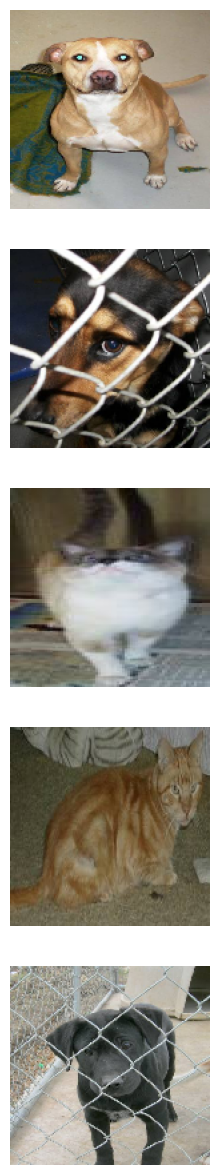

In [59]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [60]:
# 5
# 5
train_image_generator = ImageDataGenerator(rescale=1/255, fill_mode="nearest",
                                           horizontal_flip=True, vertical_flip=True,
                                           width_shift_range=0.3, height_shift_range=0.3,
                                           zoom_range=0.25, shear_range=0.25)


Found 2000 images belonging to 2 classes.


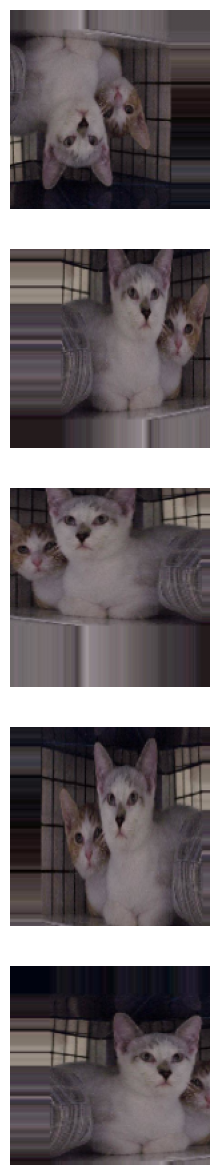

In [61]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [62]:
# 7
# 7
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Dense(2))
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss=SparseCategoricalCrossentropy(from_logits=True))

model.compile(optimizer='adam', metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))
model.summary()


Model: "sequential"

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,869 (9.39 MB)

 Trainable params: 2,460,869 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# 8
history = model.fit(train_data_gen, steps_per_epoch=total_train//batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=total_val//batch_size, verbose=1)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.4758 - loss: 1.0055 - val_accuracy: 0.5078 - val_loss: 0.6933
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.5312 - loss: 0.6930 - val_accuracy: 0.5769 - val_loss: 0.6837
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.5271 - loss: 0.6893 - val_accuracy: 0.5692 - val_loss: 0.6861
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5625 - loss: 0.6874 - val_accuracy: 0.6058 - val_loss: 0.6823
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.5150 - loss: 0.6856 - val_accuracy: 0.6127 - val_loss: 0.6598
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5703 - loss: 0.6798 - val_accuracy: 0.5192 - val_loss: 0.6884
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.5469 - loss: 0.6740 - val_accuracy: 0.5580 - val_loss: 0.6585
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6172 - loss: 0.6471 - val_accuracy: 0.6442 - val_l

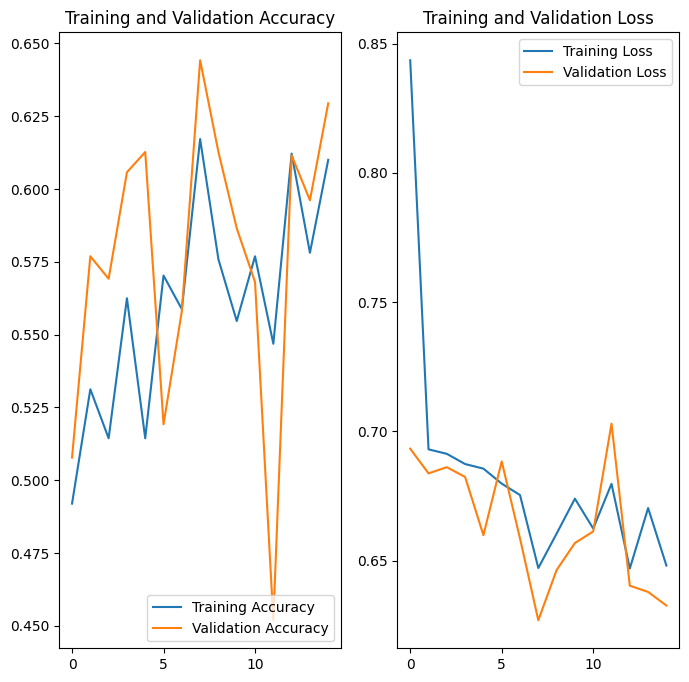

In [64]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


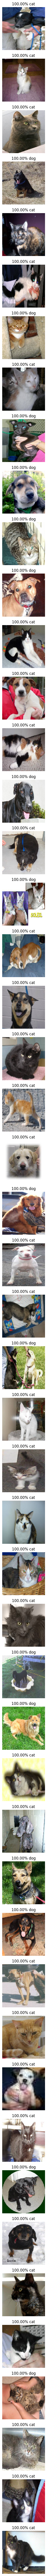

In [65]:
test_images, _ = next(test_data_gen)
# print(test_images,_)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
# print(model.predict(test_data_gen))
plotImages(test_images, probabilities=probabilities)

In [76]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
